In [1]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Enable inline display of plots in Jupyter
%matplotlib inline


In [2]:
# Set your video path here
video_path = "Thermal Video/video1.mp4"  # Change path to your video file

# Define red color HSV ranges
lower_red1 = np.array([0, 50, 50])       # Light red shades
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 50, 50])     # Deep red shades
upper_red2 = np.array([180, 255, 255])


In [3]:
def detect_red_intensity(frame):
    """
    Detects the red intensity in a frame.
    Returns:
        total_red_pixels: number of red pixels detected
        red_mask: binary mask of red zones
        red_zone: masked output image showing only red zones
    """
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    red_mask = cv2.bitwise_or(mask1, mask2)

    red_zone = cv2.bitwise_and(frame, frame, mask=red_mask)
    total_red_pixels = cv2.countNonZero(red_mask)
    
    return total_red_pixels, red_mask, red_zone


🔥 Alert at 0:00:00: Red intensity increased significantly!


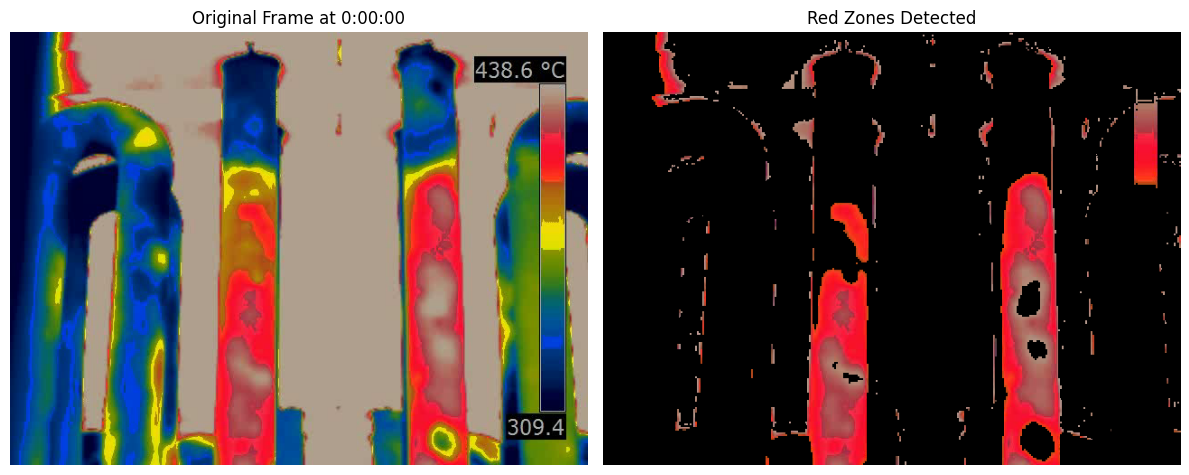

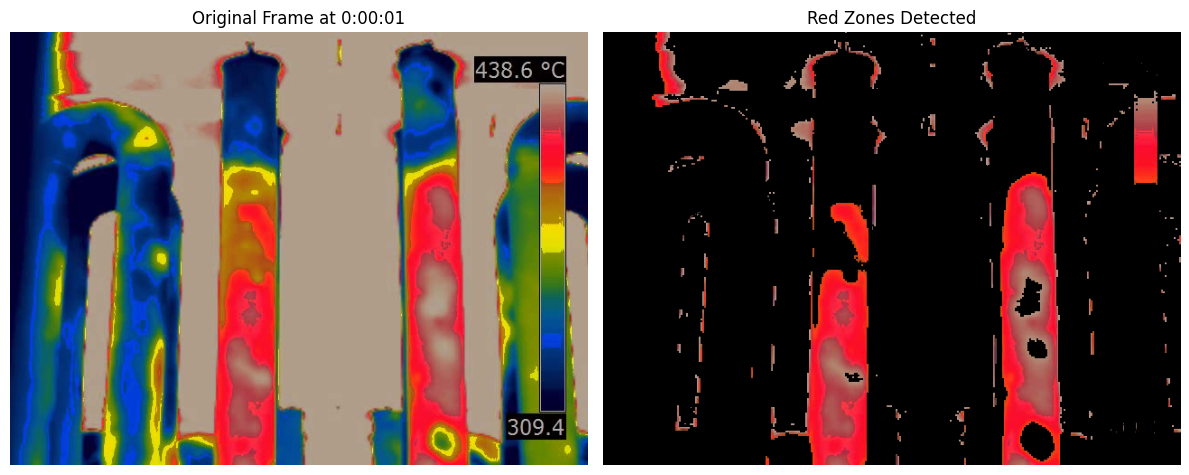

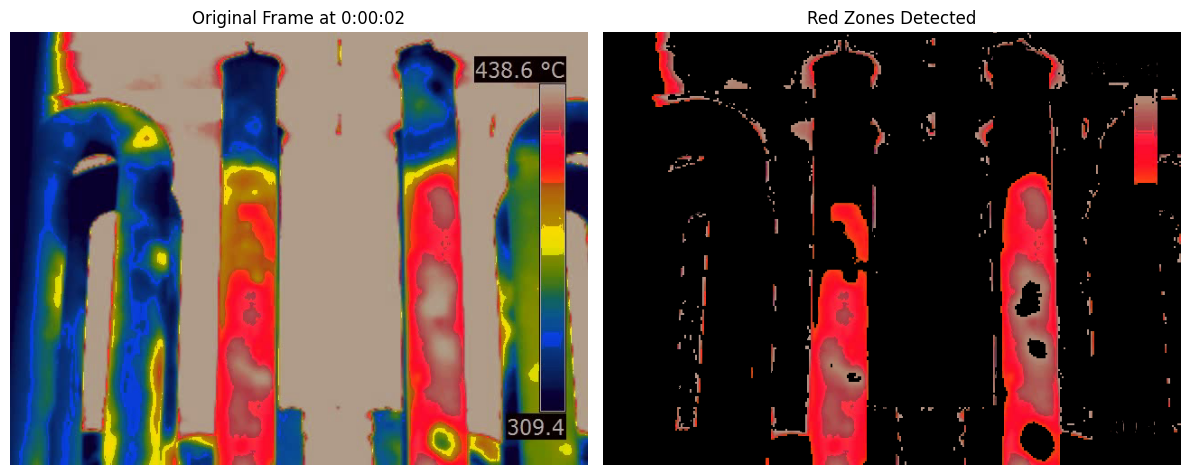

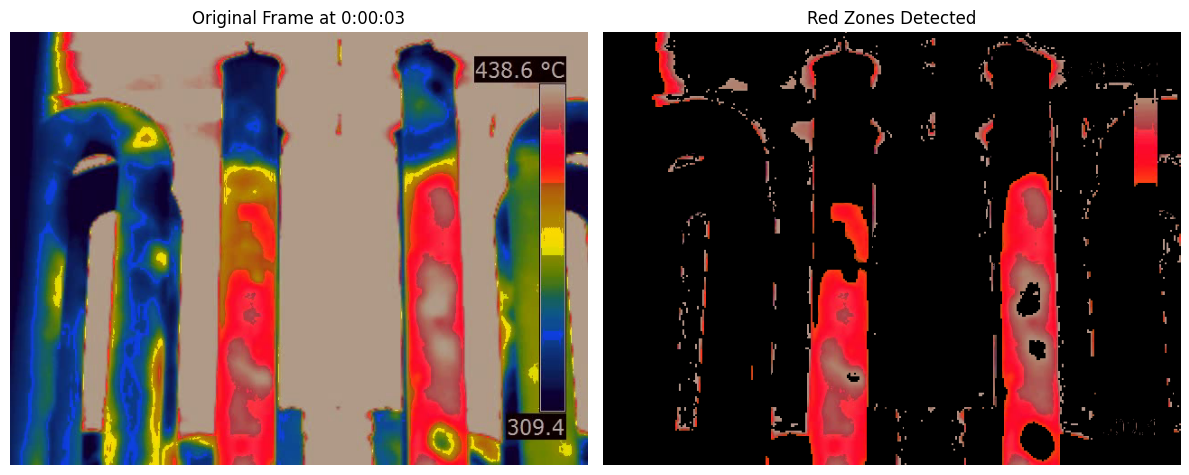

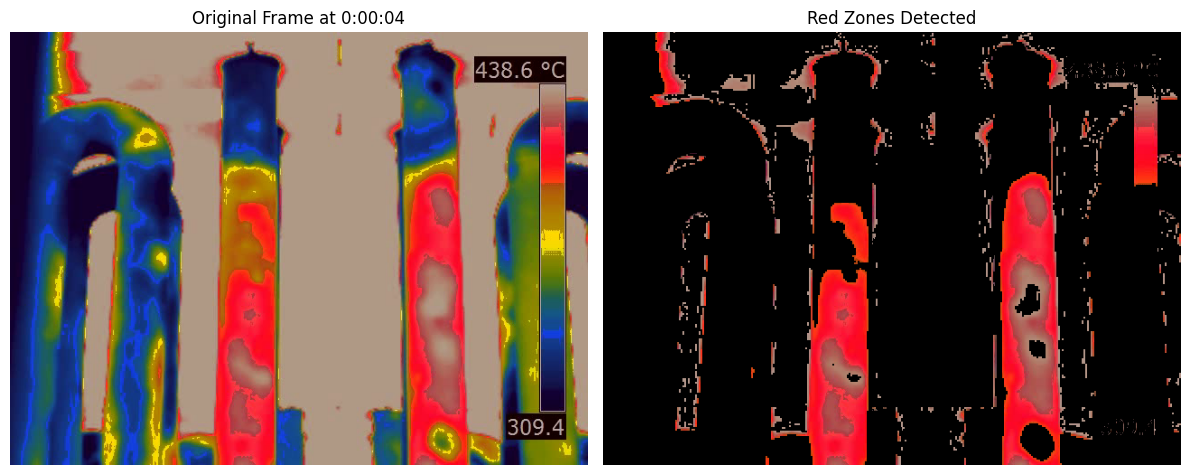

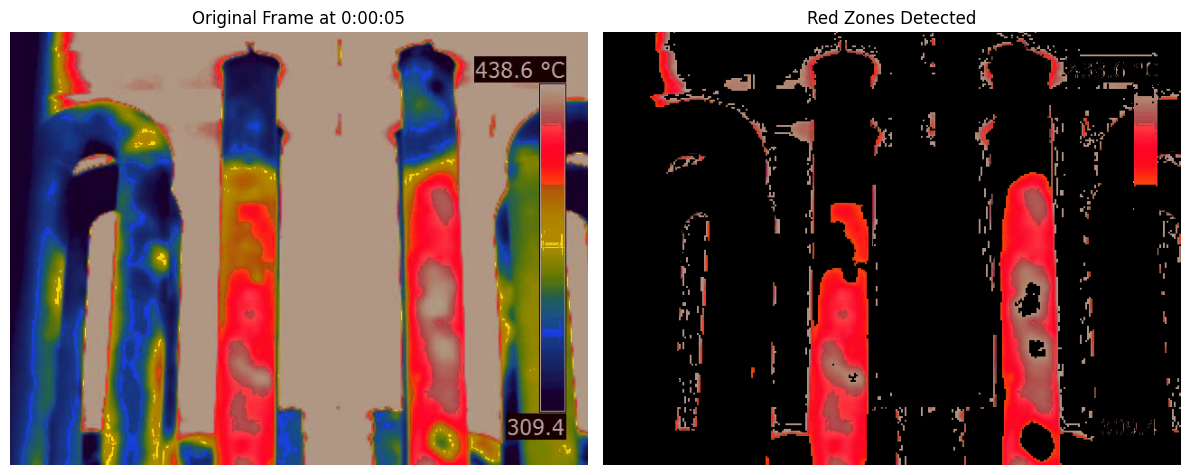

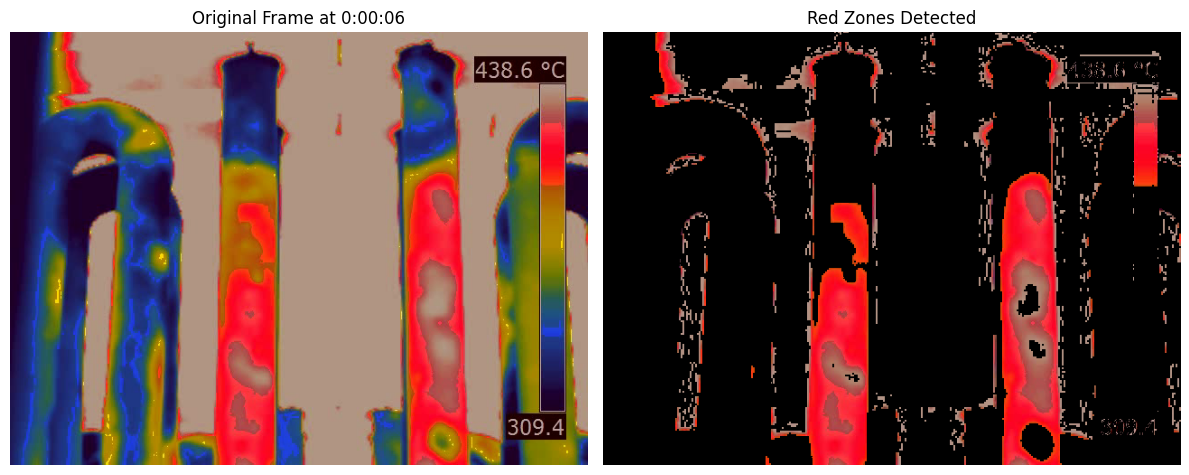

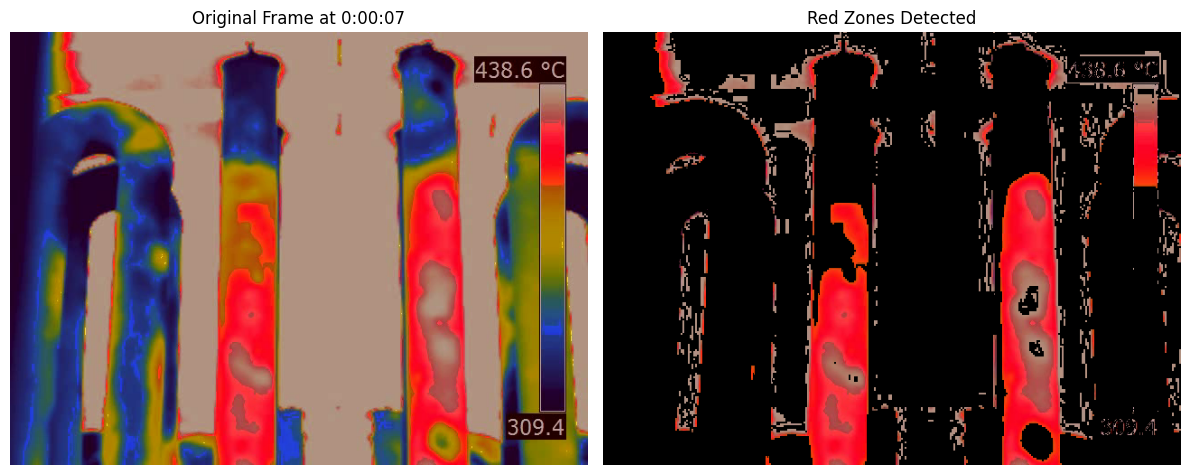

🔥 Alert at 0:00:08: Red intensity increased significantly!


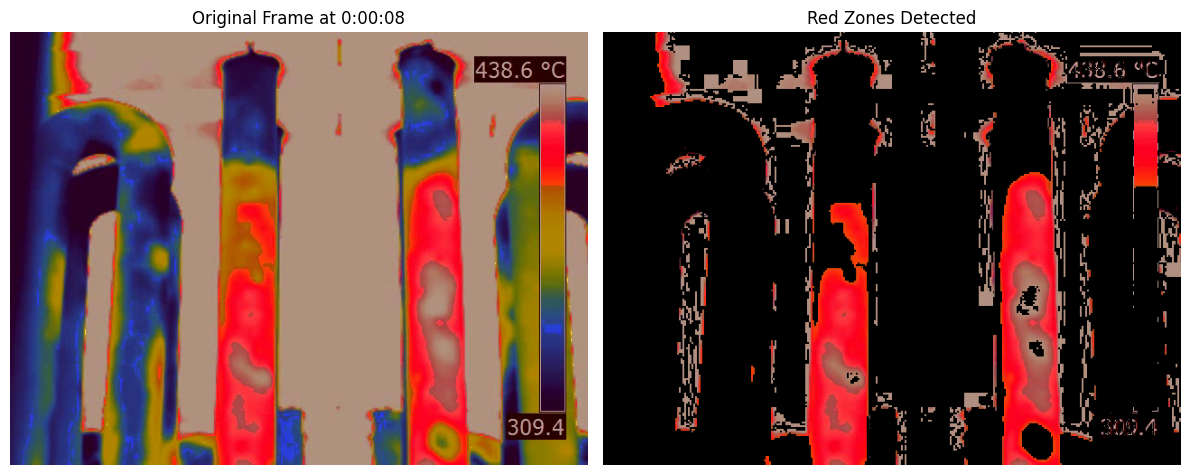

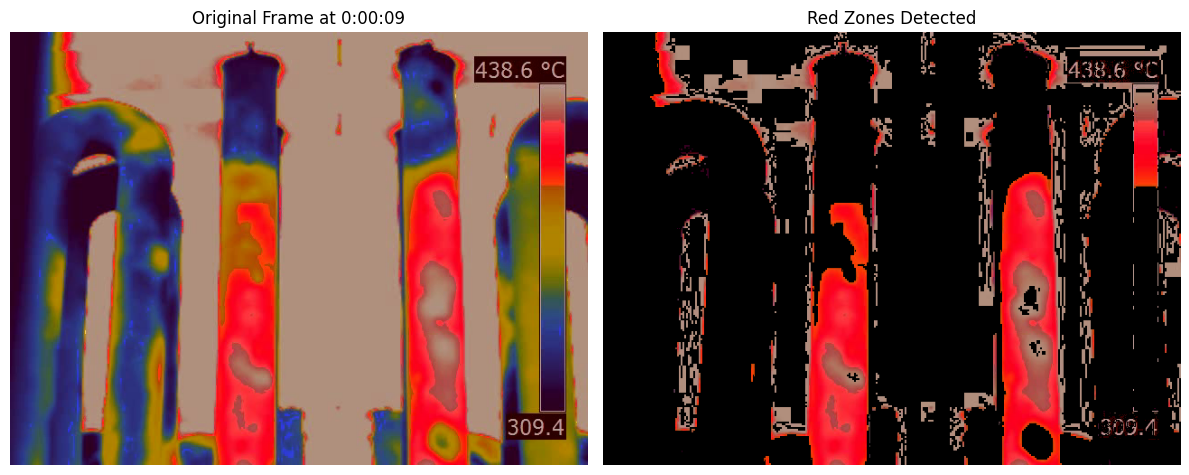

🔥 Alert at 0:00:09.233333: Red intensity increased significantly!


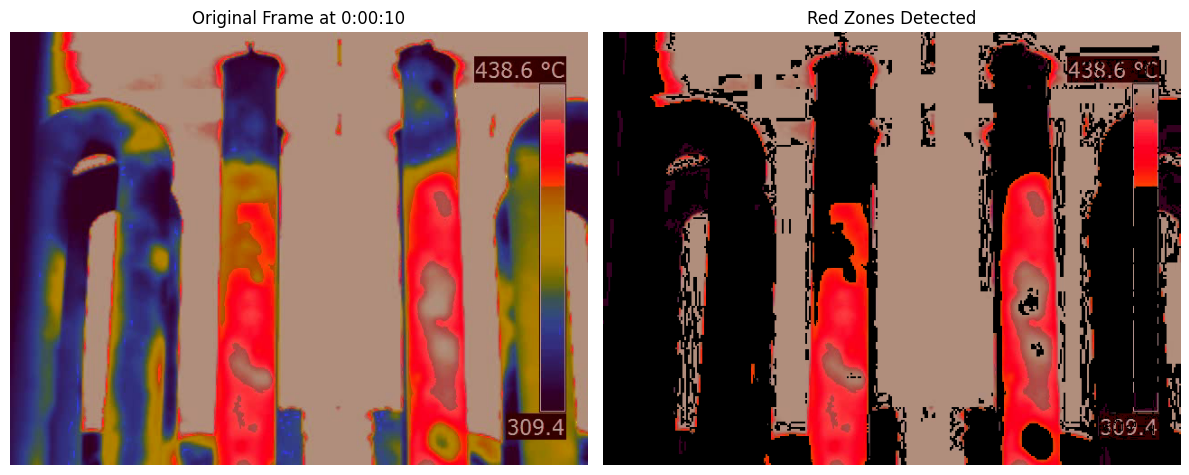

🔥 Alert at 0:00:10.266667: Red intensity increased significantly!
🔥 Alert at 0:00:10.433333: Red intensity increased significantly!
🔥 Alert at 0:00:10.800000: Red intensity increased significantly!


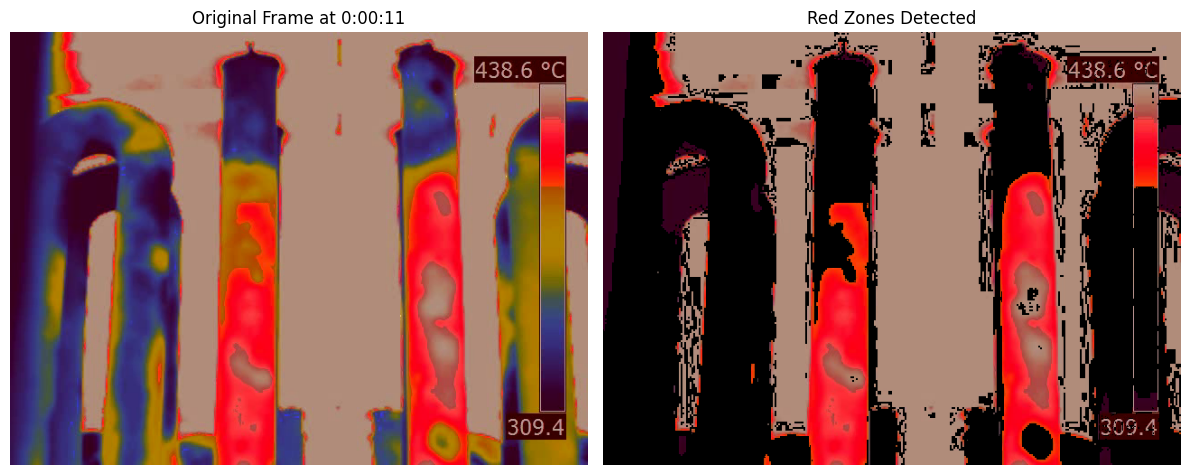

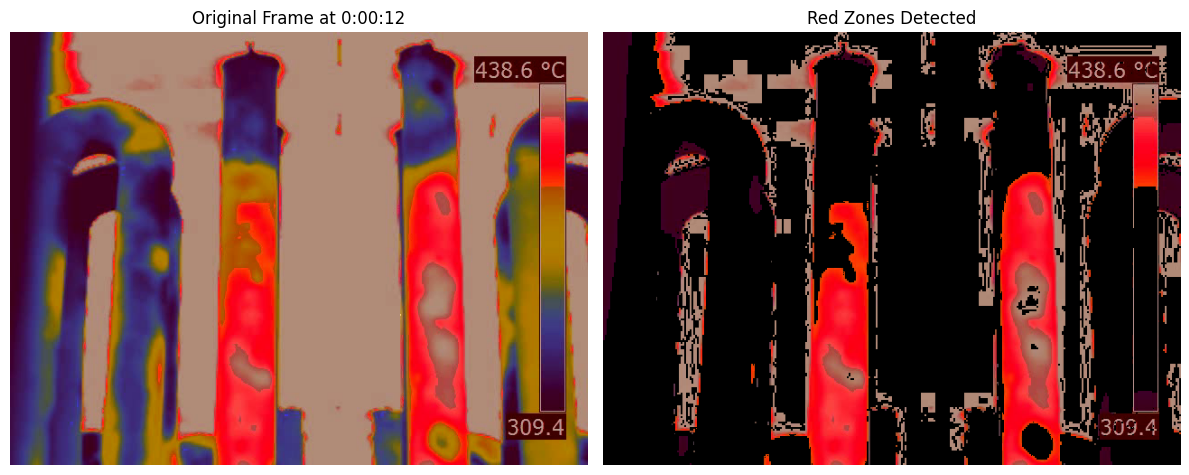

🔥 Alert at 0:00:12.033333: Red intensity increased significantly!


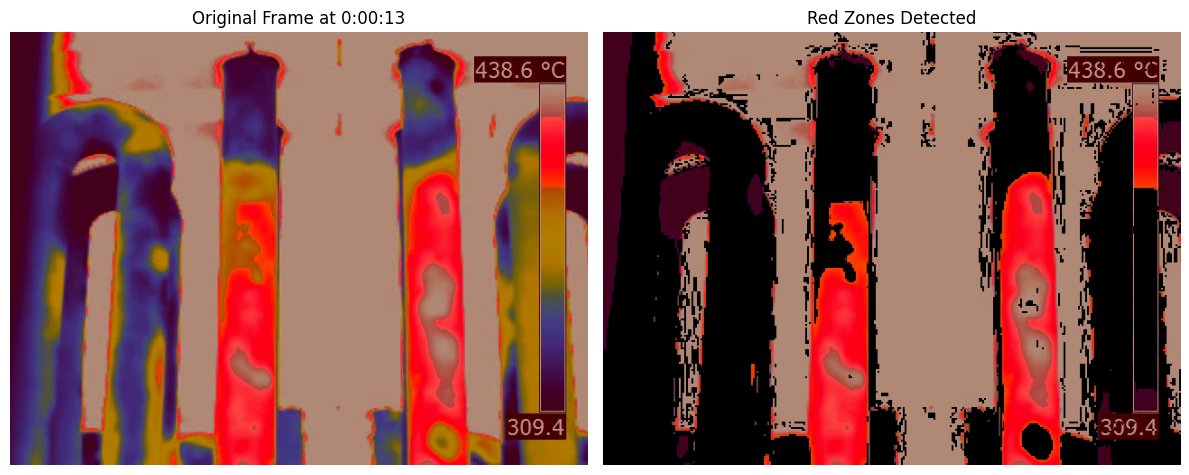

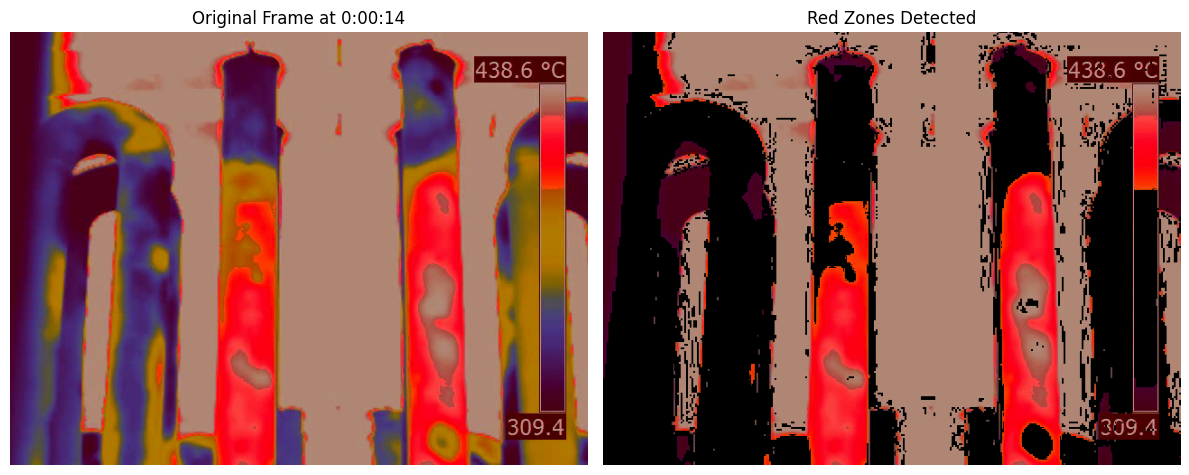

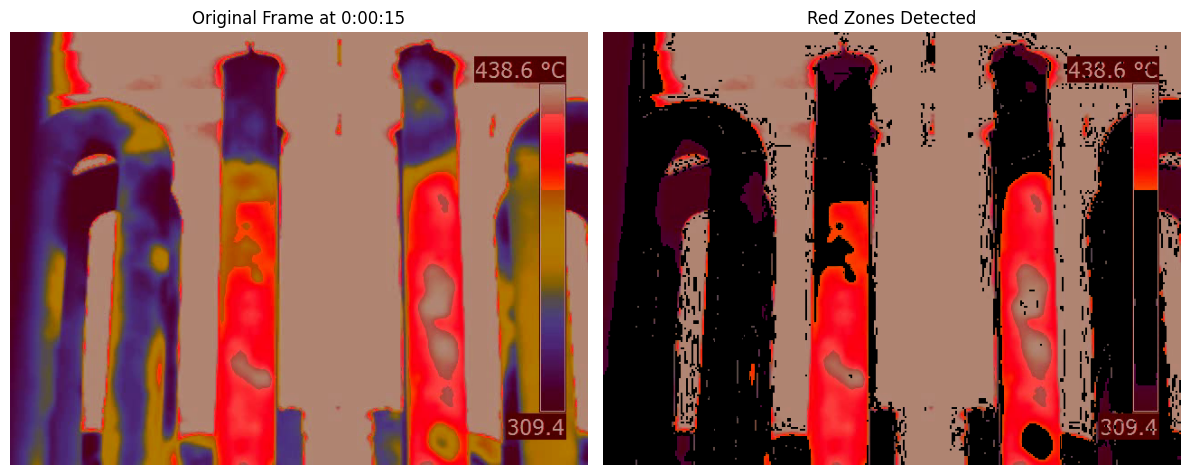

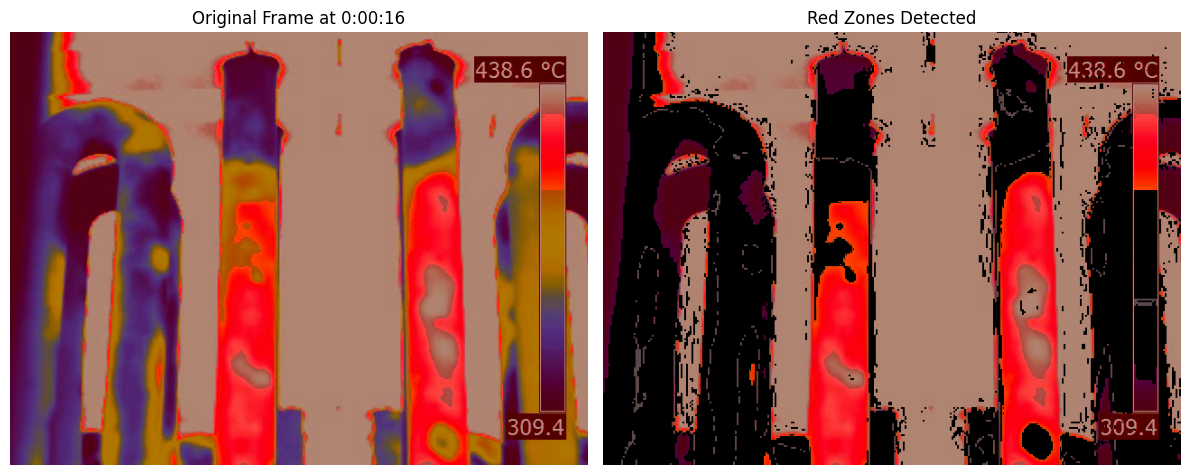

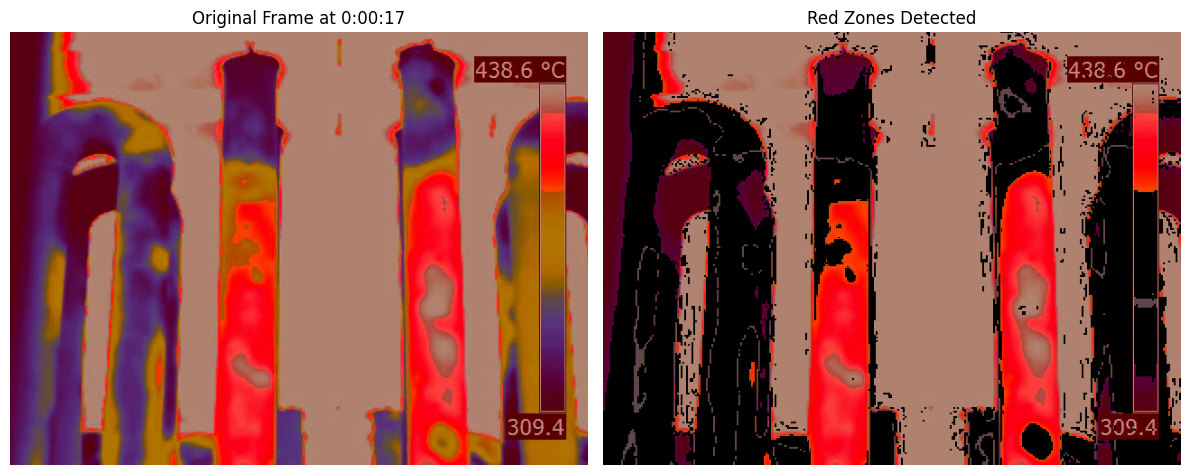

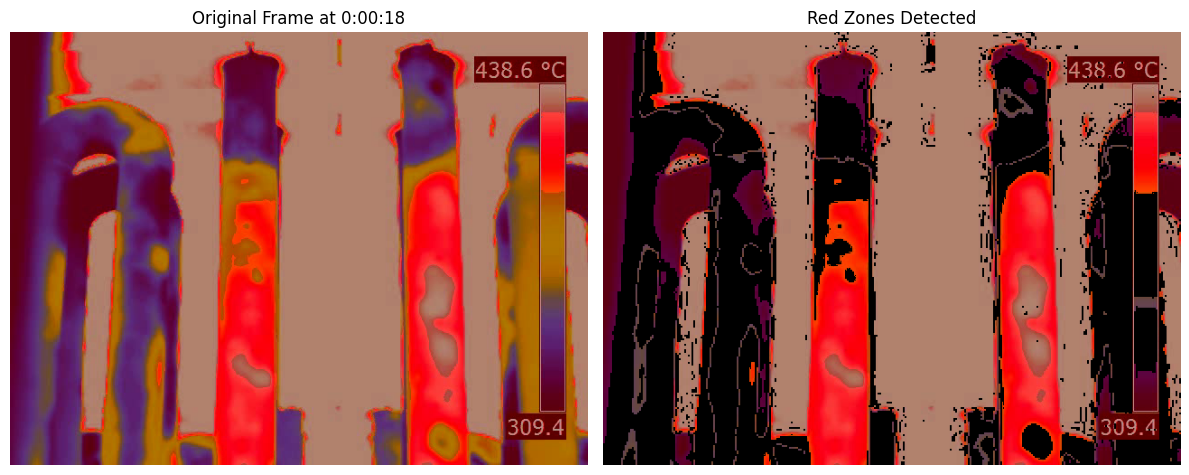

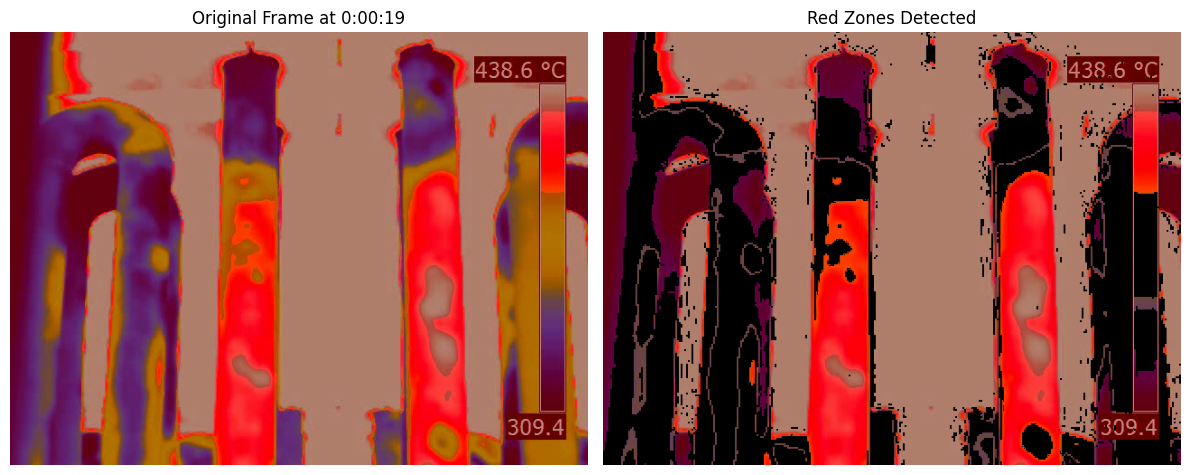

✅ Video processing completed.


In [4]:
# Open the video
cap = cv2.VideoCapture(video_path)

# Get the frame rate of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Previous red pixel count to compare for intensity change
prev_red_pixels = 0

# Thresholds (You can tune these)
red_alert_threshold = 10000  # Minimum red pixels to trigger alert
intensity_jump = 3000        # Jump in red pixels considered as increase

frame_index = 0  # To track current frame number

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit loop if no frame is read (end of video)
    
    # Detect red zone in the current frame
    red_pixels, red_mask, red_output = detect_red_intensity(frame)
    
    # Compute the current timestamp of this frame
    timestamp = str(timedelta(seconds=frame_index / fps))
    
    # Condition to check increase in red intensity
    if red_pixels > red_alert_threshold and (red_pixels - prev_red_pixels) > intensity_jump:
        print(f"🔥 Alert at {timestamp}: Red intensity increased significantly!")
    
    # For visual understanding (display every 30th frame)
    if frame_index % 30 == 0:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        red_output_rgb = cv2.cvtColor(red_output, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(frame_rgb)
        plt.title(f"Original Frame at {timestamp}")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(red_output_rgb)
        plt.title("Red Zones Detected")
        plt.axis("off")
        plt.tight_layout()
        plt.show()

    # Update for next loop
    prev_red_pixels = red_pixels
    frame_index += 1

# Release video
cap.release()
print("✅ Video processing completed.")
